# Agenda
- MNIST Data
- Model Architecture
- Model Training
- Model Inference/Prediction

In [36]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
%matplotlib inline

In [37]:
data = pd.read_csv('./MNIST_data/train.csv')
X_test = pd.read_csv('./MNIST_data/test.csv')

In [38]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
data_y = data['label']
data_x = data.drop('label', axis=1)
data_x.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


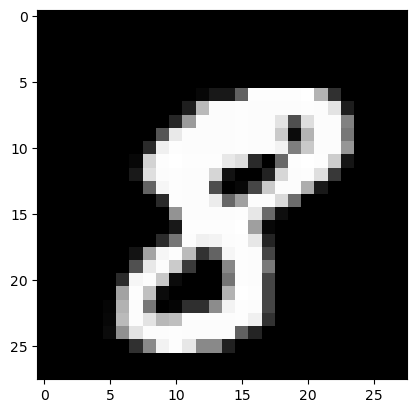

In [40]:
# this is a 28x28 image 
img = data_x.values.reshape(-1, 28, 28)
plt.imshow(img[10], cmap='gray')

In [41]:
set(data_y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

## Model architecture


In [92]:
# Let's create a model architecture

model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='softmax') # 10 classes
])

# The architecture of the model has 1 input layer, 3 hidden layers and 1 output layer.

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [93]:
model.compile(keras.optimizers.SGD(), loss='mean_squared_error', metrics=['mse'])
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 135,306 (528.54 KB)

 Trainable params: 135,050 (527.54 KB)

 Non-trainable params: 256 (1.00 KB)

### Model training

In [94]:
# Split the data into training and testing data
X_train, X_val, y_train, y_val = train_test_split(data_x, data_y, test_size=0.2, random_state=42)

In [95]:
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 27.5173 - mse: 27.5173 - val_loss: 27.3435 - val_mse: 27.3435
Epoch 2/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 27.3002 - mse: 27.3002 - val_loss: 27.3421 - val_mse: 27.3421
Epoch 3/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 27.2610 - mse: 27.2610 - val_loss: 27.3413 - val_mse: 27.3413
Epoch 4/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 27.3358 - mse: 27.3358 - val_loss: 27.3407 - val_mse: 27.3407
Epoch 5/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 27.2037 - mse: 27.2037 - val_loss: 27.3402 - val_mse: 27.3402


In [96]:
# without dropout layer: loss: 27.2101 - mse: 27.2101 - val_loss: 27.4139 - val_mse: 27.4139
# with dropout layer: loss: 27.3395 - mse: 27.3395 - val_loss: 27.4201 - val_mse: 27.4201

### Model Prediction

In [97]:
model.predict(X_test).argmax(axis=1)

875/875 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step


array([4, 7, 8, ..., 6, 6, 8])

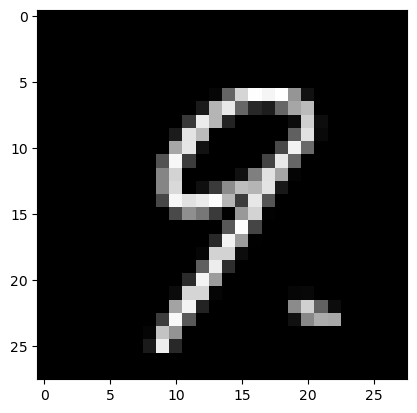

In [98]:
plt.imshow(X_test.values[2].reshape(28, 28), cmap='gray')